## Clean and merge data

In [ ]:
import pandas as pd

# List of file names to process
file_names = [
    "abm_milk_choice_upload experimentCampGrid1-table 1.csv",
    "abm_milk_choice_upload experimentCampGrid2-table 1.csv",
    "abm_milk_choice_upload experimentCampGrid3-table 1.csv",
    "abm_milk_choice_upload experimentCampGrid4-table 1.csv",
    "abm_milk_choice_upload experimentNonPolarizedNew-table .csv",
    "PolarizedNew-table.csv"
]

# Initialize an empty list to store cleaned dataframes
cleaned_dfs = []
cumulative_run_number = 0

# Process each file
for file in file_names:
    # Read the dataset, skipping the first 6 rows
    df = pd.read_csv(file, skiprows=6, sep=",")  # Ensure correct delimiter (adjust to actual file format)
    
    # Check if the dataset was misread as a single column
    if len(df.columns) == 1:
        # Re-read using a different delimiter if necessary
        df = pd.read_csv(file, skiprows=6, sep="\t")
    
    # Standardize column names by stripping whitespace
    df.columns = df.columns.str.strip()
    
    # Adjust `run number` to ensure cumulative numbering
    df["[run number]"] += cumulative_run_number
    cumulative_run_number = df["[run number]"].max() 
    
    # Append to the cleaned dataframes list
    cleaned_dfs.append(df)

# Concatenate all datasets
merged_data = pd.concat(cleaned_dfs, axis=0, ignore_index=True)

# Filter for the last step of each run number
filtered_data = merged_data.loc[merged_data.groupby("[run number]")["[step]"].idxmax()]

# Filter for the first step of each run number
first_step_data = merged_data.loc[merged_data.groupby("[run number]")["[step]"].idxmin()]

# Merge the filtered data to calculate differences
result = filtered_data.merge(
    first_step_data[["[run number]", "mean-oat", "mean-almond", "mean-soy", "mean-incum"]],
    on="[run number]",
    suffixes=("_last", "_first")
)

# Calculate the differences
result["mean-oat-diff"] = result["mean-oat_last"] - result["mean-oat_first"]
result["mean-almond-diff"] = result["mean-almond_last"] - result["mean-almond_first"]
result["mean-soy-diff"] = result["mean-soy_last"] - result["mean-soy_first"]
result["mean-incum-diff"] = result["mean-incum_last"] - result["mean-incum_first"]



# Display the resulting dataset
print(result.info())
result.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   [run number]                         5120 non-null   int64  
 1   habit-threshold                      5120 non-null   int64  
 2   p-interact                           5120 non-null   float64
 3   incumbent-initial-habit              5120 non-null   int64  
 4   social-blindness                     5120 non-null   float64
 5   cognitive-dissonance-threshold       5120 non-null   float64
 6   network-parameter                    5120 non-null   int64  
 7   social-conformity                    5120 non-null   float64
 8   social-susceptibility                5120 non-null   float64
 9   justification                        5120 non-null   float64
 10  memory-lifetime                      5120 non-null   int64  
 11  oat-health-mean-initial       

,[run number],habit-threshold,p-interact,incumbent-initial-habit,social-blindness,cognitive-dissonance-threshold,network-parameter,social-conformity,social-susceptibility,justification,...,mean-almond_last,mean-soy_last,mean-oat_first,mean-almond_first,mean-soy_first,mean-incum_first,mean-oat-diff,mean-almond-diff,mean-soy-diff,mean-incum-diff
0,1,8,0.6,8,0.0,0.0,8,-1.0,0.8,0.9,...,350.587347,397.159749,100.0,100.0,100.0,2000.0,255.246024,250.587347,297.159749,-1650.881020
1,2,8,0.6,8,0.0,0.0,8,-1.0,1.0,0.9,...,264.362656,354.660036,100.0,100.0,100.0,2000.0,306.478566,164.362656,254.660036,-1663.137118
2,3,8,0.6,8,0.0,0.0,8,-0.6,0.8,0.9,...,252.207776,422.681814,100.0,100.0,100.0,2000.0,253.479040,152.207776,322.681814,-1663.884230
3,4,8,0.6,8,0.0,0.0,8,-0.6,1.0,0.9,...,247.117236,429.972156,100.0,100.0,100.0,2000.0,250.262883,147.117236,329.972156,-1663.804295
4,5,8,0.6,8,0.0,0.0,10,-1.0,0.8,0.9,...,341.659504,366.453831,100.0,100.0,100.0,2000.0,230.640696,241.659504,266.453831,-1669.727411


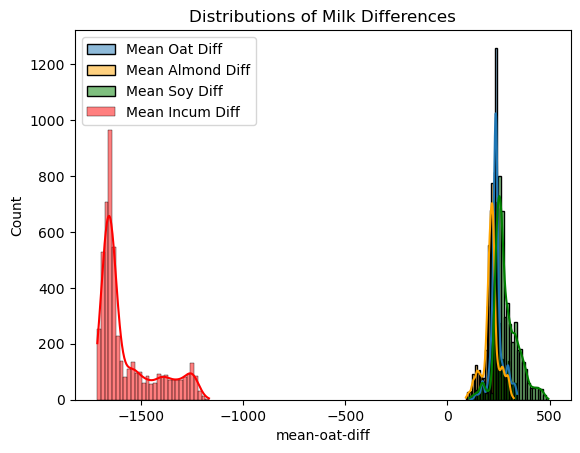

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distributions of the _diff variables
sns.histplot(result["mean-oat-diff"], kde=True, bins=30, label="Mean Oat Diff")
sns.histplot(result["mean-almond-diff"], kde=True, bins=30, color="orange", label="Mean Almond Diff")
sns.histplot(result["mean-soy-diff"], kde=True, bins=30, color="green", label="Mean Soy Diff")
sns.histplot(result["mean-incum-diff"], kde=True, bins=30, color="red", label="Mean Incum Diff")
plt.legend()
plt.title("Distributions of Milk Differences")
plt.show()


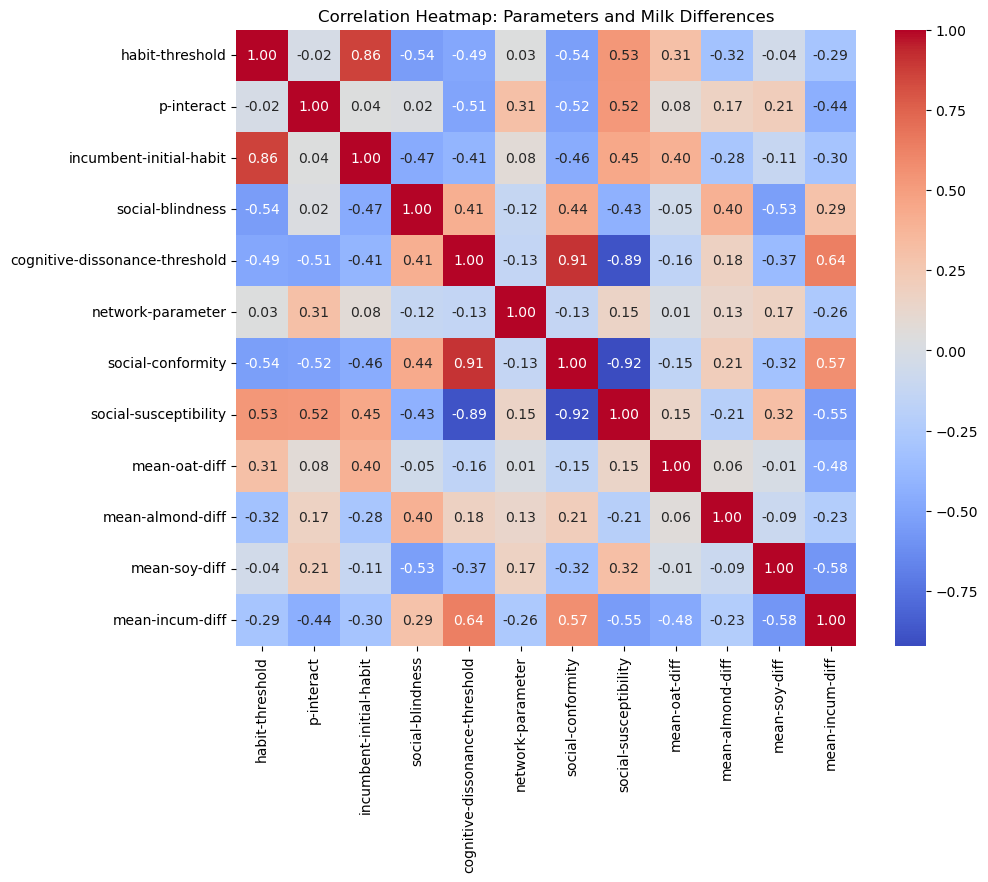

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `result` is the dataset containing mean-oat-diff, mean-almond-diff, mean-soy-diff, mean-incum-diff
# and the parameters mentioned in the first image.

# Select columns for correlation
columns_of_interest = [
    "habit-threshold", "p-interact", "incumbent-initial-habit",
    "social-blindness", "cognitive-dissonance-threshold", "network-parameter",
    "social-conformity", "social-susceptibility", "mean-oat-diff",
    "mean-almond-diff", "mean-soy-diff", "mean-incum-diff"
]

# Ensure only relevant columns are selected and drop NaN values
filtered_data = result[columns_of_interest].dropna()

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Parameters and Milk Differences")
plt.show()


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming the dataset `result` is already loaded
parameters = [
    "habit-threshold", "p-interact", "incumbent-initial-habit",
    "social-blindness", "cognitive-dissonance-threshold", "network-parameter",
    "social-conformity", "social-susceptibility"
]

# Standardize the selected parameters
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(result[parameters]), columns=parameters)

# Add standardized data back to the original dataset for analysis
result_standardized = result.copy()
for param in parameters:
    result_standardized[f"std_{param}"] = standardized_data[param]

# Compute the correlation matrix to check for multicollinearity
correlation_matrix = result_standardized[parameters].corr()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Standardized Parameter Data", dataframe=result_standardized)
correlation_matrix


,habit-threshold,p-interact,incumbent-initial-habit,social-blindness,cognitive-dissonance-threshold,network-parameter,social-conformity,social-susceptibility
habit-threshold,1.000000,-0.018462,0.863564,-0.542645,-0.487903,0.034207,-0.536097,0.528238
p-interact,-0.018462,1.000000,0.035622,0.024408,-0.507806,0.309771,-0.521568,0.520686
incumbent-initial-habit,0.863564,0.035622,1.000000,-0.468541,-0.409594,0.075017,-0.457748,0.450348
social-blindness,-0.542645,0.024408,-0.468541,1.000000,0.413363,-0.120439,0.436982,-0.432119
cognitive-dissonance-threshold,-0.487903,-0.507806,-0.409594,0.413363,1.000000,-0.132844,0.909893,-0.885784
network-parameter,0.034207,0.309771,0.075017,-0.120439,-0.132844,1.000000,-0.129787,0.153680
social-conformity,-0.536097,-0.521568,-0.457748,0.436982,0.909893,-0.129787,1.000000,-0.920538
social-susceptibility,0.528238,0.520686,0.450348,-0.432119,-0.885784,0.153680,-0.920538,1.000000


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming the dataset is named 'data' and contains the specified parameters
parameters = [
    "habit-threshold", "p-interact", "incumbent-initial-habit",
    "social-blindness", "cognitive-dissonance-threshold", "network-parameter",
    "social-conformity", "social-susceptibility"
]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(result[parameters])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(standardized_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Combine PCA results with explained variance for visualization
pca_summary = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance
})

#import ace_tools as tools; tools.display_dataframe_to_user(name="PCA Summary with Explained Variance", dataframe=pca_summary)

pca_summary


,Principal Component,Explained Variance Ratio
0,PC1,0.518287
1,PC2,0.201342
2,PC3,0.120929
3,PC4,0.077511
4,PC5,0.044072
5,PC6,0.014949
6,PC7,0.013763
7,PC8,0.009147


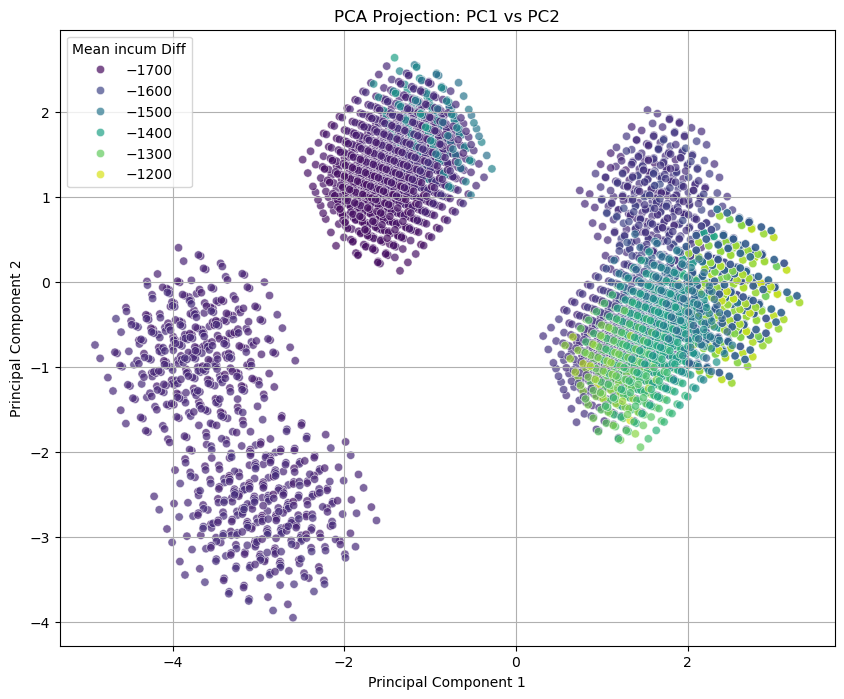

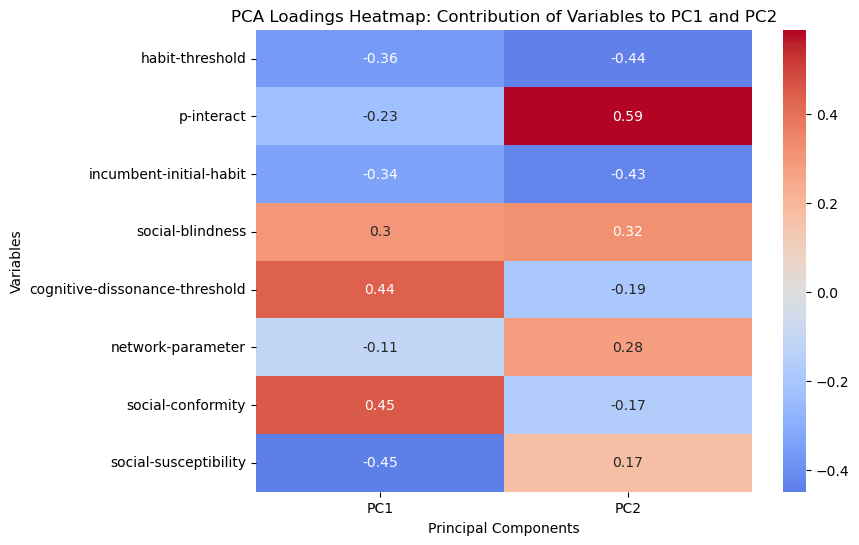

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Project data onto the first two principal components
pca_projected = pca_result[:, :2]
pca_df = pd.DataFrame(pca_projected, columns=["PC1", "PC2"])

# Add labels for the target variables (optional for visualization)
pca_df["mean-oat-diff"] = result["mean-oat-diff"]
pca_df["mean-almond-diff"] = result["mean-almond-diff"]
pca_df["mean-soy-diff"] = result["mean-soy-diff"]
pca_df["mean-incum-diff"] = result["mean-incum-diff"]

# Plot the PCA projection
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="mean-incum-diff", palette="viridis", alpha=0.7)
plt.title("PCA Projection: PC1 vs PC2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Mean incum Diff")
plt.grid(True)
plt.show()

# Analyze contributions (loadings) of original features to PC1 and PC2
pca_loadings = pd.DataFrame(pca.components_[:2].T, 
                            columns=["PC1", "PC2"], 
                            index=parameters)

# Display the loadings for PC1 and PC2
#import ace_tools as tools; tools.display_dataframe_to_user(name="PCA Loadings for PC1 and PC2", dataframe=pca_loadings)

# Show the loadings heatmap for visual interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(pca_loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap: Contribution of Variables to PC1 and PC2")
plt.xlabel("Principal Components")
plt.ylabel("Variables")
plt.show()


In [45]:
import pandas as pd

# 假设 pca_df 包含了 PC1 和 PC2，result 包含了目标变量
# 合并 PCA 分数和目标变量
regression_data = pd.DataFrame({
    'PC1': pca_df['PC1'],
    'PC2': pca_df['PC2'],
    'mean_oat_diff': result['mean-oat-diff'],
    'mean_almond_diff': result['mean-almond-diff'],
    'mean_soy_diff': result['mean-soy-diff'],
    'mean_incum_diff': result['mean-incum-diff']
})


In [46]:
import statsmodels.api as sm

# 定义一个函数来执行回归并显示结果
def perform_regression(y_var):
    X = regression_data[['PC1', 'PC2']]
    y = regression_data[y_var]
    X = sm.add_constant(X)  # 添加截距项
    model = sm.OLS(y, X).fit()
    print(f"Regression results for {y_var}:\n")
    print(model.summary())
    print("\n")

# 对每个目标变量执行回归
for target in ['mean_oat_diff', 'mean_almond_diff', 'mean_soy_diff', 'mean_incum_diff']:
    perform_regression(target)


Regression results for mean_oat_diff:

                            OLS Regression Results                            
Dep. Variable:          mean_oat_diff   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     222.4
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.40e-93
Time:                        17:38:44   Log-Likelihood:                -24832.
No. Observations:                5120   AIC:                         4.967e+04
Df Residuals:                    5117   BIC:                         4.969e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [47]:
import statsmodels.api as sm

# Define target variables and features
targets = ["mean-oat-diff", "mean-almond-diff", "mean-soy-diff"]
features = ["incumbent-initial-habit", "social-blindness"]

# Results dictionary to store regression outputs for each target
regression_results = {}

# Perform regression for each target
for target in targets:
    X = result[features]
    y = result[target]
    
    # Add a constant for the intercept
    X = sm.add_constant(X)
    
    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()
    
    # Store the summary
    regression_results[target] = model.summary()

# Display the regression summaries
regression_results


{'mean-oat-diff': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          mean-oat-diff   R-squared:                       0.181
 Model:                            OLS   Adj. R-squared:                  0.180
 Method:                 Least Squares   F-statistic:                     564.0
 Date:                Thu, 28 Nov 2024   Prob (F-statistic):          4.32e-222
 Time:                        18:30:44   Log-Likelihood:                -24536.
 No. Observations:                5120   AIC:                         4.908e+04
 Df Residuals:                    5117   BIC:                         4.910e+04
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------

In [50]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm

# Select the predictors and the target variables for regression
predictors = ["incumbent-initial-habit", "social-blindness"]
targets = ["mean-oat-diff", "mean-almond-diff", "mean-soy-diff"]

# Standardize the predictors
scaler = StandardScaler()
scaled_predictors = scaler.fit_transform(result[predictors])

# Create a DataFrame for the scaled predictors
scaled_df = pd.DataFrame(scaled_predictors, columns=predictors)

# Perform regression for each target variable
regression_results = {}
for target in targets:
    X = scaled_df  # Use the standardized predictors
    X = sm.add_constant(X)  # Add a constant term for the intercept
    y = result[target]
    model = sm.OLS(y, X).fit()
    regression_results[target] = model.summary()

# Display regression summaries for each target variable
regression_results


{'mean-oat-diff': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          mean-oat-diff   R-squared:                       0.181
 Model:                            OLS   Adj. R-squared:                  0.180
 Method:                 Least Squares   F-statistic:                     564.0
 Date:                Thu, 28 Nov 2024   Prob (F-statistic):          4.32e-222
 Time:                        18:43:23   Log-Likelihood:                -24536.
 No. Observations:                5120   AIC:                         4.908e+04
 Df Residuals:                    5117   BIC:                         4.910e+04
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------